<a href="https://colab.research.google.com/github/HarshithPulijala/COVID-19-Data-Analysis-and-Visualization/blob/main/COVID_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("covid_data.csv")
df.head()  # Display first 5 rows


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
print(df.isnull().sum())  # Check missing values
df.fillna(0, inplace=True)  # Replace NaN with 0


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [ ]:
df.info()  # Check column data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
# Convert 'Confirmed' column to NumPy array
cases = df['Confirmed'].to_numpy()

# Calculate Mean, Median, Standard Deviation
mean_cases = np.mean(cases)
median_cases = np.median(cases)
std_cases = np.std(cases)

print(f"Mean Cases: {mean_cases}, Median Cases: {median_cases}, Std Dev: {std_cases}")

Mean Cases: 88130.935828877, Median Cases: 5059.0, Std Dev: 382292.3737323721


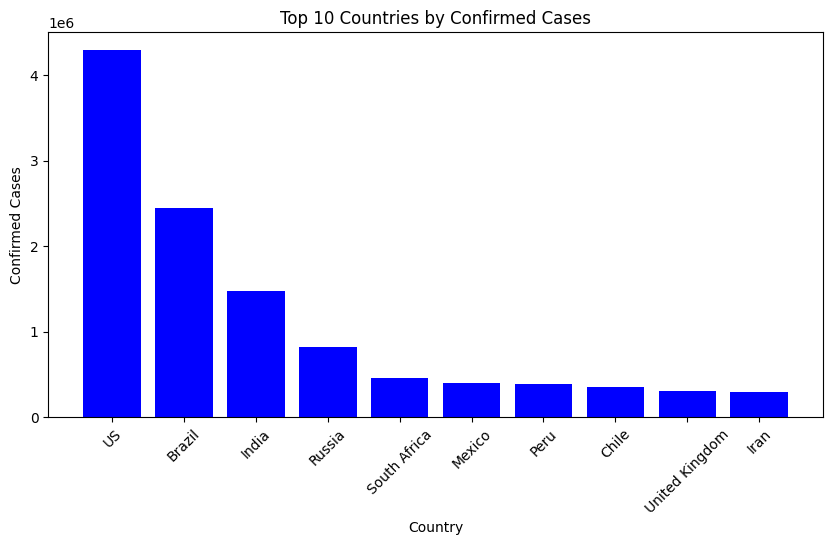

In [ ]:
top_10 = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_10['Country/Region'], top_10['Confirmed'], color='blue')
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.title("Top 10 Countries by Confirmed Cases")
plt.xticks(rotation=45)
plt.show()

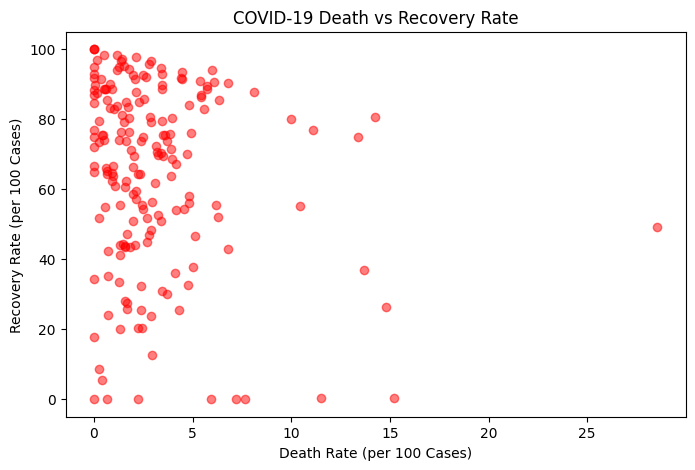

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Deaths / 100 Cases'], df['Recovered / 100 Cases'], color='red', alpha=0.5)
plt.xlabel("Death Rate (per 100 Cases)")
plt.ylabel("Recovery Rate (per 100 Cases)")
plt.title("COVID-19 Death vs Recovery Rate")
plt.show()


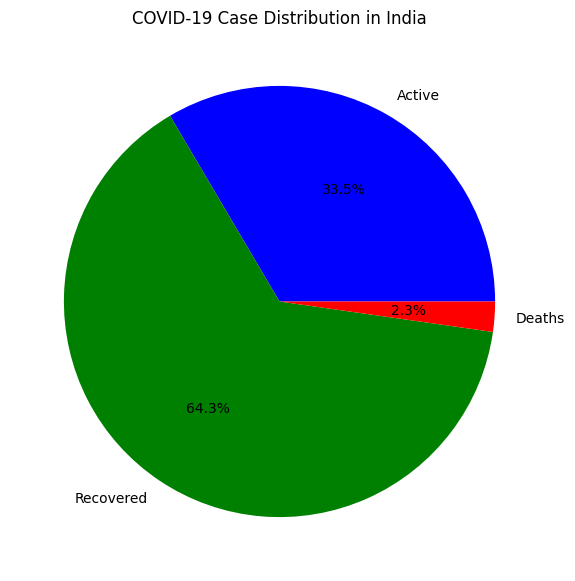

In [ ]:
# Select a specific country (e.g., India)
country_data = df[df['Country/Region'] == 'India']

# Data for the pie chart
labels = ['Active', 'Recovered', 'Deaths']
sizes = [country_data['Active'].values[0], country_data['Recovered'].values[0], country_data['Deaths'].values[0]]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("COVID-19 Case Distribution in India")
plt.show()
